In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [9]:
data = pd.read_csv('forestfires.csv')

In [10]:
data = data. drop_duplicates()

In [14]:
if data.isnull().sum().sum() > 0:
    data = data.fillna(data.median())

In [16]:
data_description = data.describe()
print("Descriptive Statistics:\n", data_description)

Descriptive Statistics:
                 X           Y        FFMC         DMC          DC         ISI  \
count  513.000000  513.000000  513.000000  513.000000  513.000000  513.000000   
mean     4.678363    4.300195   90.637427  110.989279  549.155166    9.023587   
std      2.320059    1.230925    5.540920   64.191013  247.724594    4.575543   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  440.900000    6.400000   
50%      4.000000    4.000000   91.600000  108.300000  664.500000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   11.000000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  513.000000  513.000000  513.000000  513.000000   513.000000  
mean    18.887524   44.348928    4.010526    0.021832    12.891598  
std      5.828128   16.358803    1.796

In [18]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [20]:
month = LabelEncoder()
data['month'] = month.fit_transform(data['month'])

In [22]:
day = LabelEncoder()
data['day'] = day.fit_transform(data['day'])

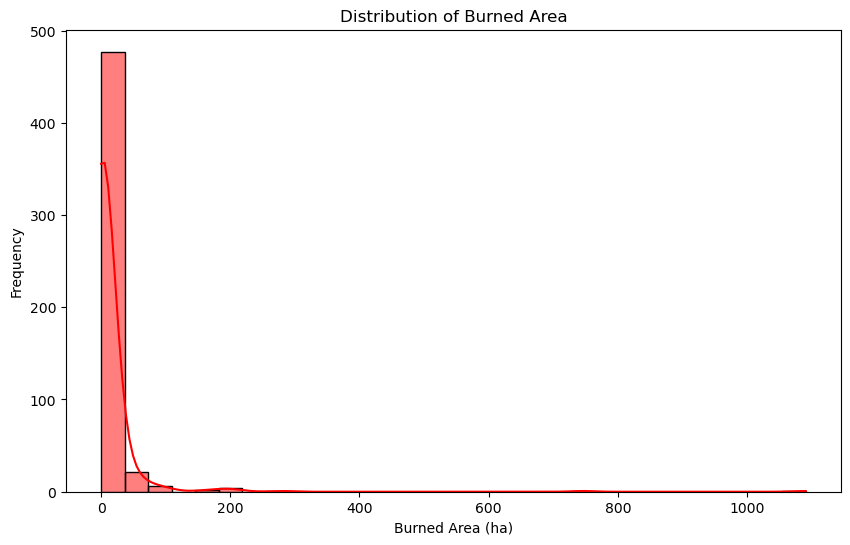

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], bins=30, kde=True, color='red')
plt.title("Distribution of Burned Area")
plt.xlabel("Burned Area (ha)")
plt.ylabel("Frequency")
plt.show()
#Distribution of Burned Area

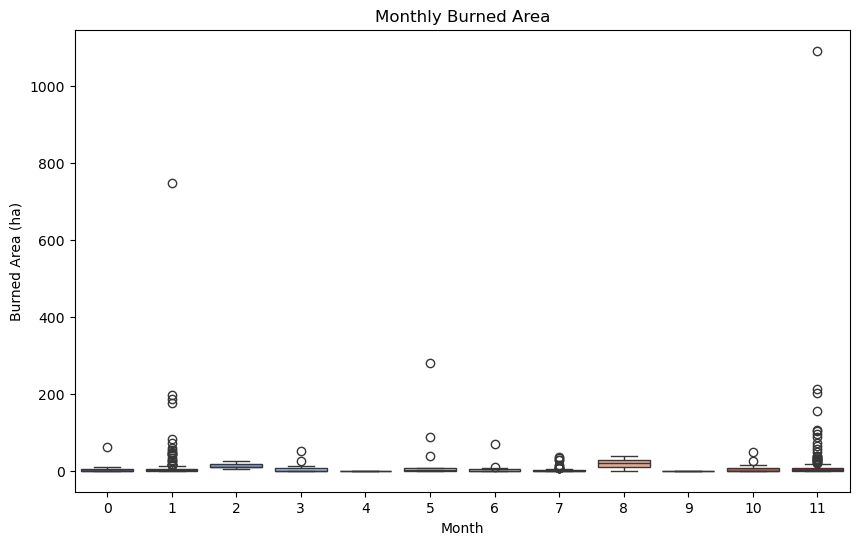

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='area', data=data, hue='month', palette='coolwarm', legend=False)
plt.title("Monthly Burned Area")
plt.xlabel("Month")
plt.ylabel("Burned Area (ha)")
plt.show()
#Montly wise distribution

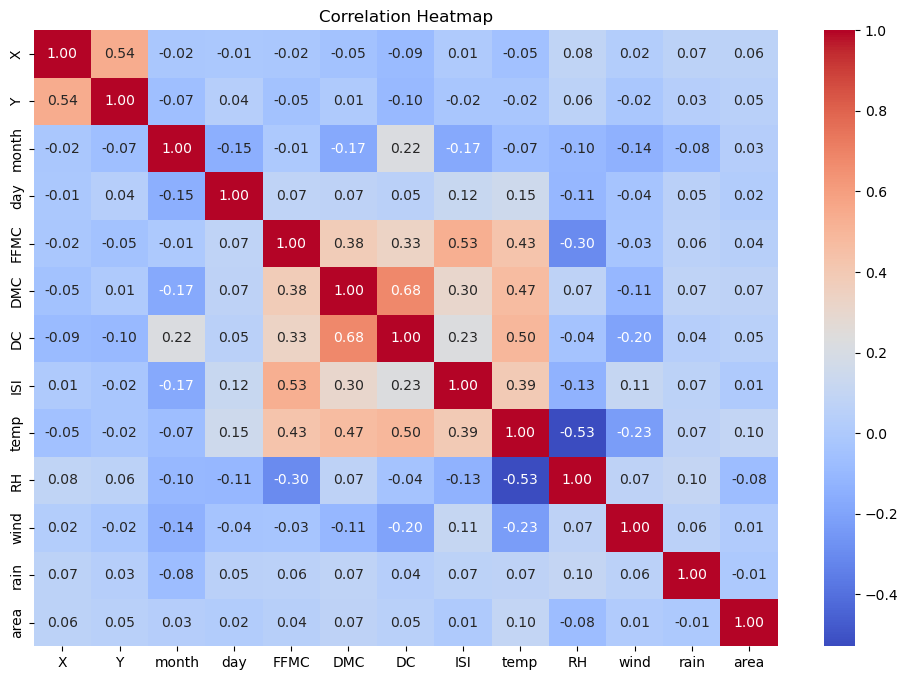

In [28]:
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\ADITYA KUSHWAHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ADITYA KUSHWAHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ADITYA KUSHWAHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ADITYA KUSHWAHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ADITYA KUSHWAHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ADITYA KUSHWAHA\anaconda3\Lib\site-packages\seaborn

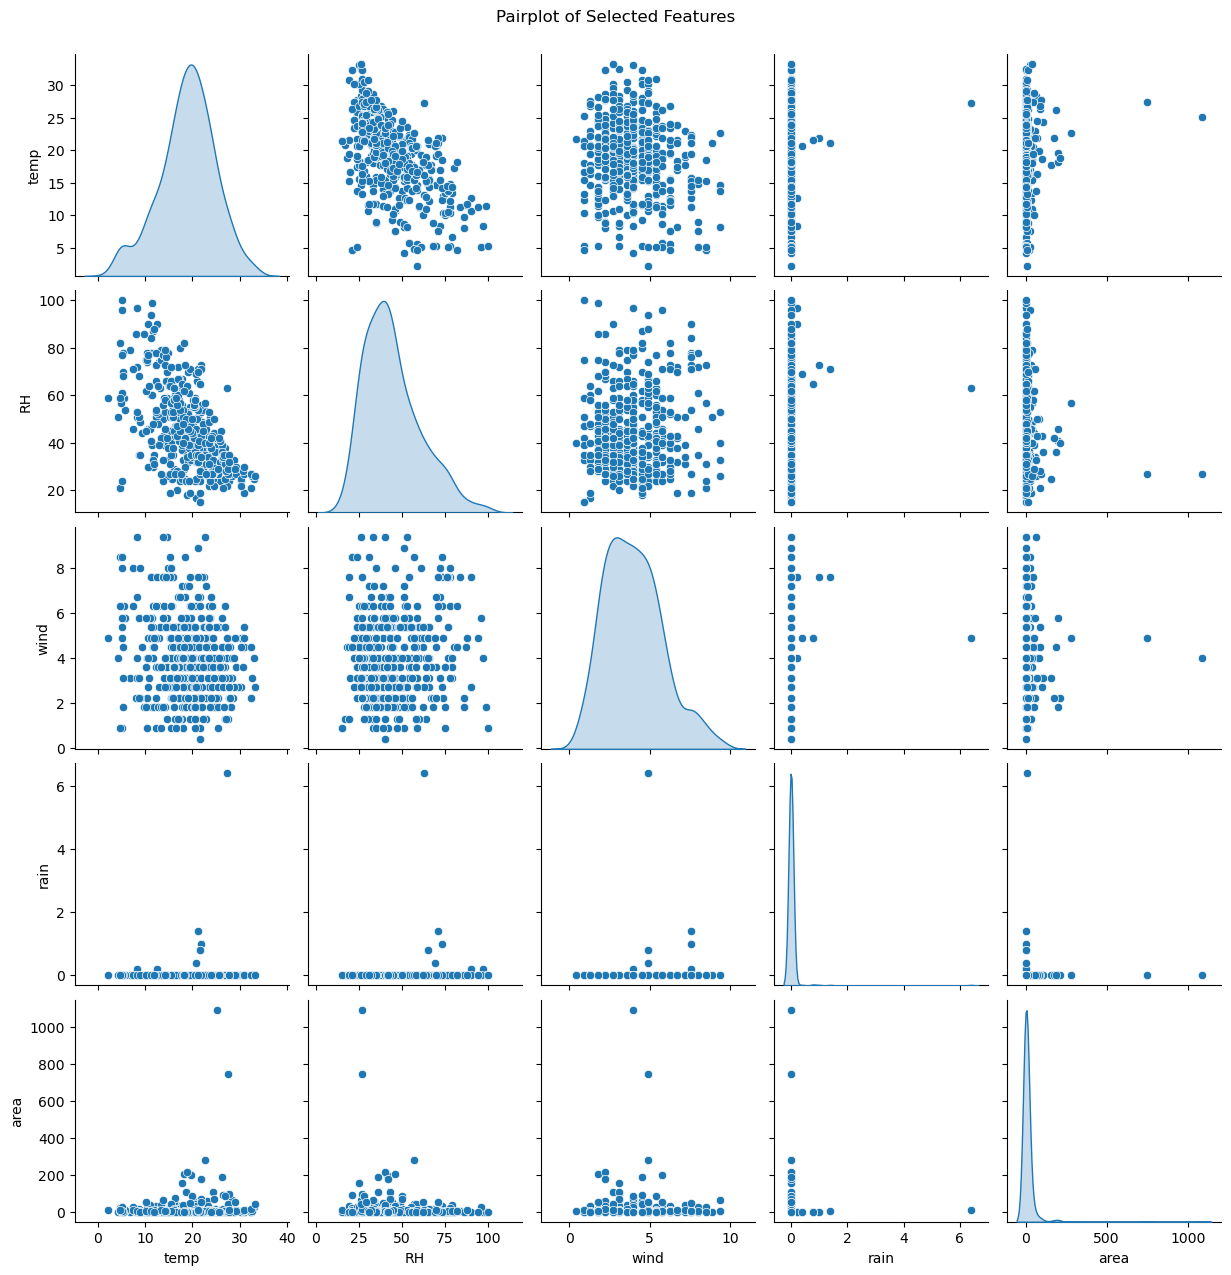

In [53]:
selected_features = ['temp', 'RH', 'wind', 'rain', 'area']
sns.pairplot(data[selected_features], diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

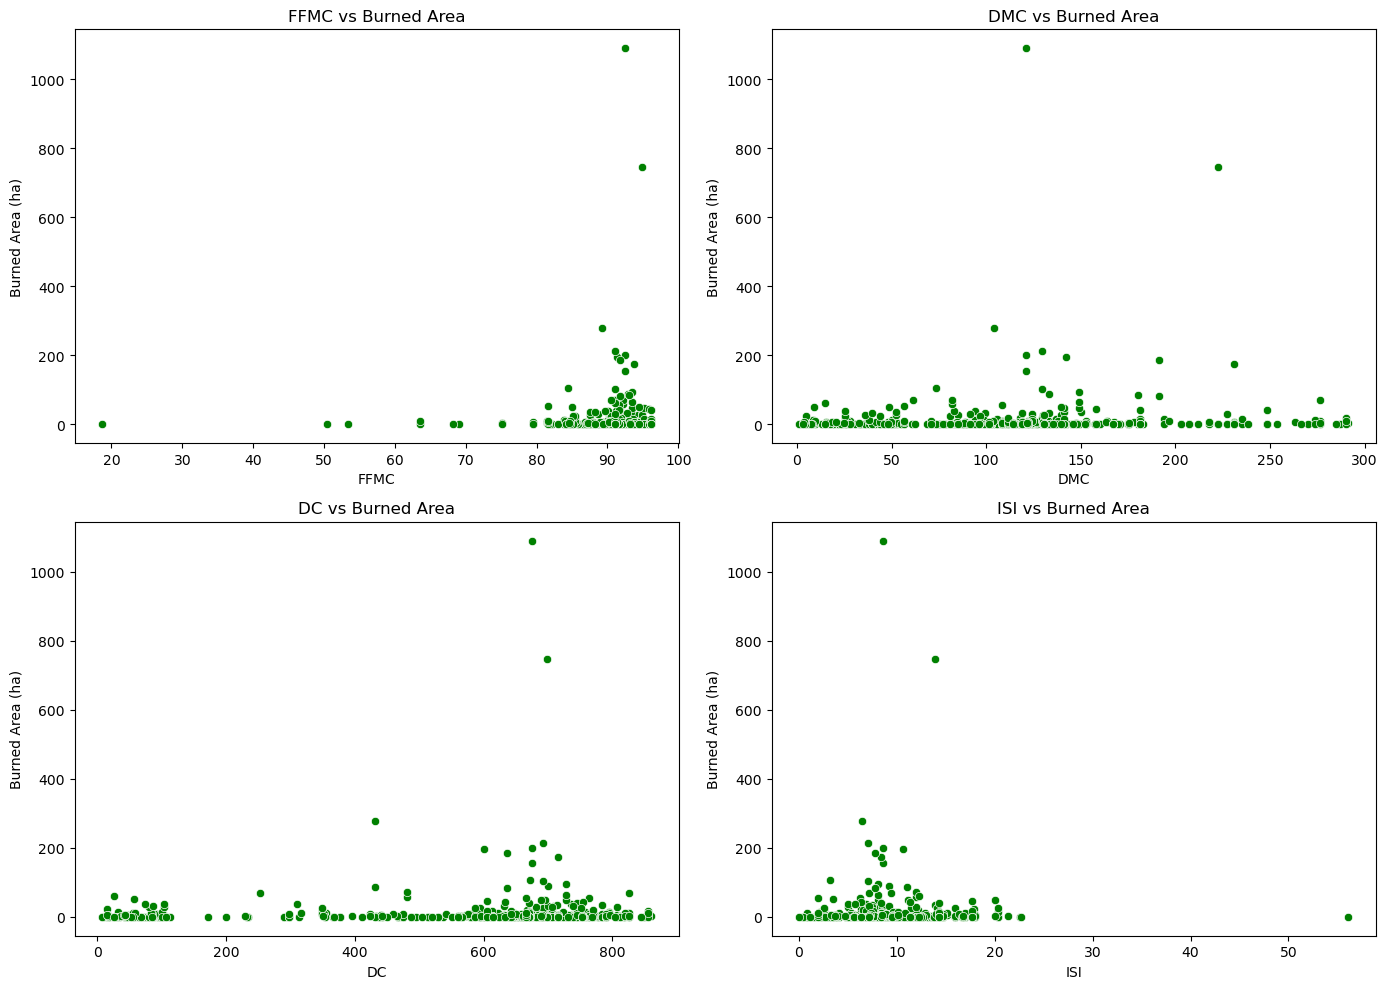

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
indices = ['FFMC', 'DMC', 'DC', 'ISI']
for i, ax in enumerate(axes.flatten()):
    sns.scatterplot(x=data[indices[i]], y=data['area'], ax=ax, color='green')
    ax.set_title(f"{indices[i]} vs Burned Area")
    ax.set_xlabel(indices[i])
    ax.set_ylabel("Burned Area (ha)")
plt.tight_layout()
plt.show()

In [32]:
X = data.drop(['area'], axis=1)
y = data['area']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred = model.predict(X_test)


In [40]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [42]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1494.557504019006
R-squared: -2.8809616369191047
Mean Absolute Error: 20.161261326860842


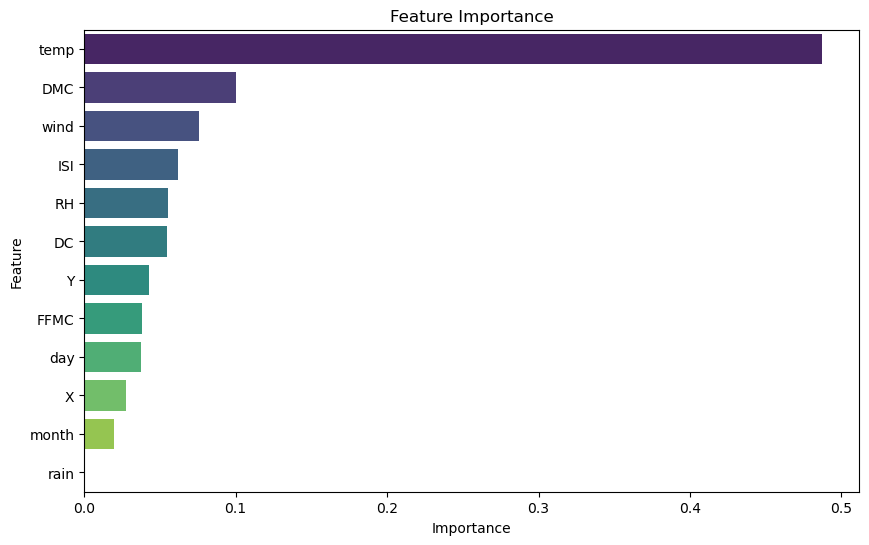

In [44]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", hue="Feature", data=feature_importance_df, palette="viridis", dodge=False)
plt.title("Feature Importance")
plt.legend([], [], frameon=False)
plt.show()

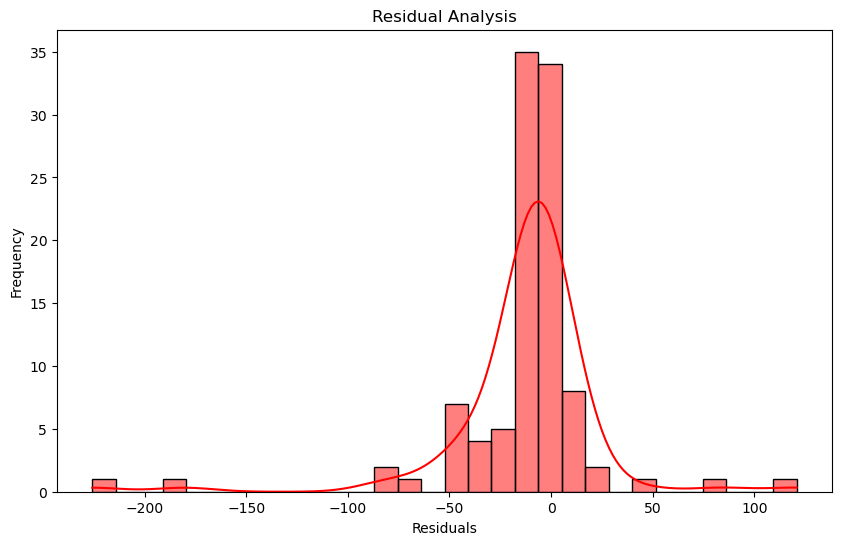

In [46]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='red')
plt.title("Residual Analysis")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

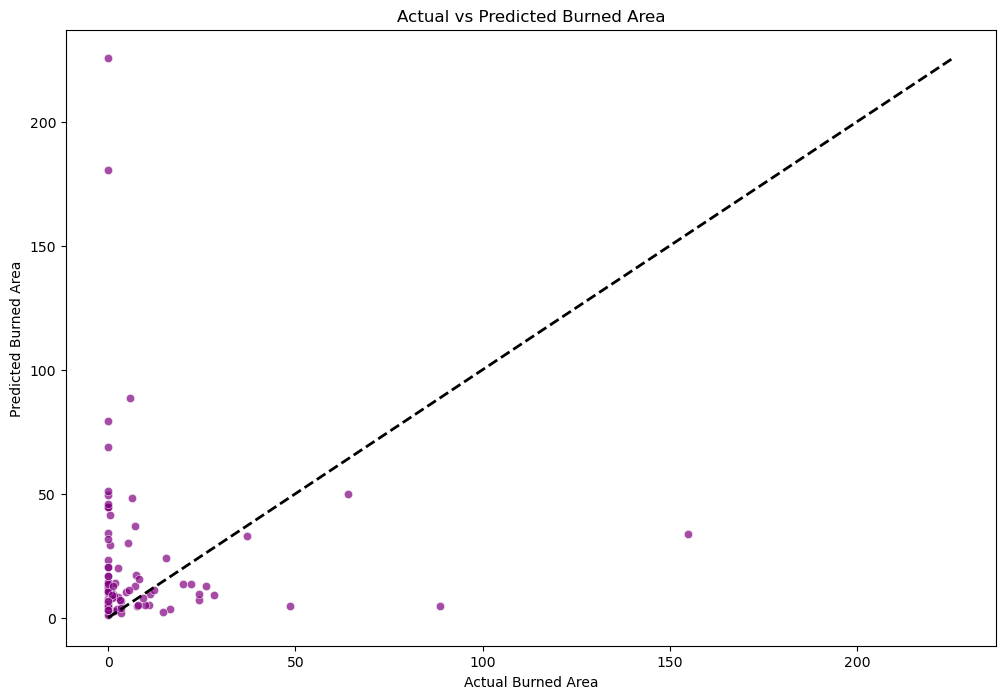

In [48]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='purple')
plt.title("Actual vs Predicted Burned Area")
plt.xlabel("Actual Burned Area")
plt.ylabel("Predicted Burned Area")
plt.plot(
    [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())],
    [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())],
    linestyle='--', lw=2, color='black'
)
plt.show()